In [1]:
from quantileRegression import quantileRegression
import pandas as pd
import numpy as np

Welcome to ROOTaaS 6.06/02


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR"]

# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [3]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

In [4]:
# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000001 
stopEvtmc  = 3000000 
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
['cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9
Number of events  
rho                          8741743
nvtx                        

In [5]:
print "Get the corrected data-mc values"
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
qr_mc.correctAllY(X, ylist, quantiles )

Get the corrected data-mc values
Loading corrected targets from :  correctedTargets.h5


In [6]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
Number of events  
rho                                    3820704
nvtx         

In [7]:
dfdata  = qr_data.getDF()
dfmc    = qr_mc.getDF()

In [8]:
print "dfdata"
print dfdata.count()
print "dfmc"
print dfmc.count()

dfdata
index                 5491556
rho                   5491556
nvtx                  5491556
Pt                    5491556
ScEta                 5491556
Phi                   5491556
R9                    5491556
S4                    5491556
SigmaIeIe             5491556
EtaWidth              5491556
PhiWidth              5491556
CovarianceIphiIphi    5491556
SigmaRR               5491556
dtype: int64
dfmc
index                      2000000
rho                        2000000
nvtx                       2000000
Pt                         2000000
ScEta                      2000000
Phi                        2000000
R9                         2000000
S4                         2000000
SigmaIeIe                  2000000
EtaWidth                   2000000
PhiWidth                   2000000
CovarianceIphiIphi         2000000
SigmaRR                    2000000
R9_corr                    2000000
S4_corr                    2000000
SigmaIeIe_corr             2000000
EtaWidth_corr            

In [9]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

['Pt', 'ScEta', 'Phi', 'rho']
Correction prediction on  ['Pt', 'ScEta', 'Phi', 'rho', 'R9']  for  R9
Read weights for MC for variable  R9
Correction file :  ./weightsCorrections/weights_corrections_R9.pkl
Correction weights for  R9  :  GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Correction prediction on  ['Pt', 'ScEta', 'Phi', 'rho', 'S4']  for  S4
Read weights for MC for variable  S4
Correction file :  ./weightsCorrections/weights_corrections_S4.pkl
Correction weights for  S4  :  GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=9, min_samples_split

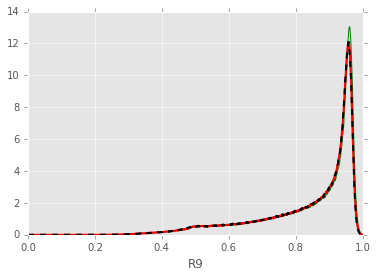

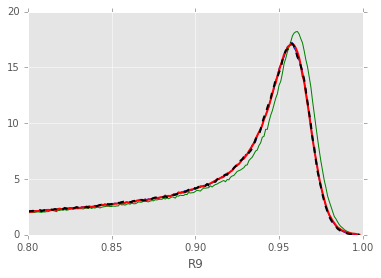

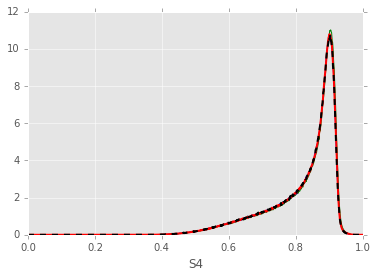

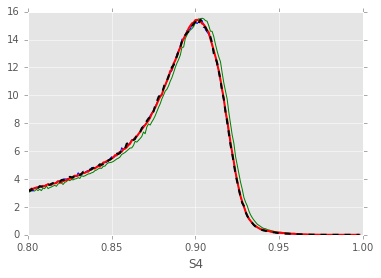

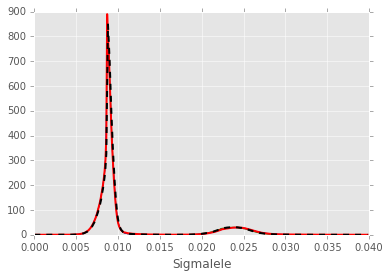

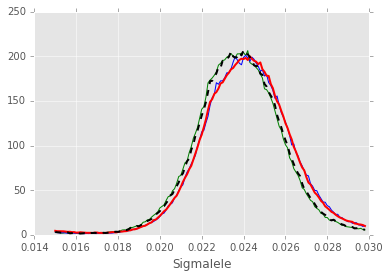

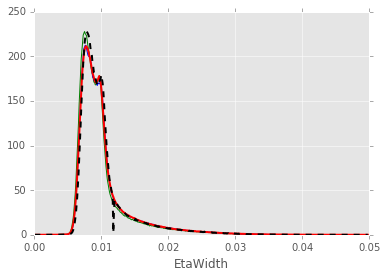

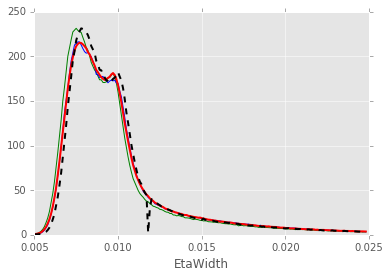

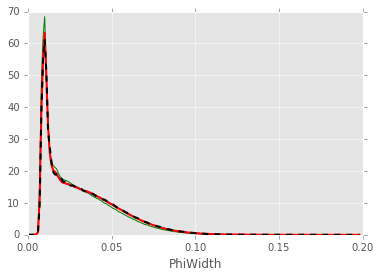

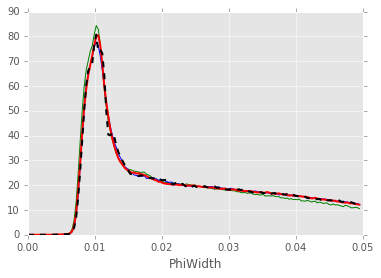

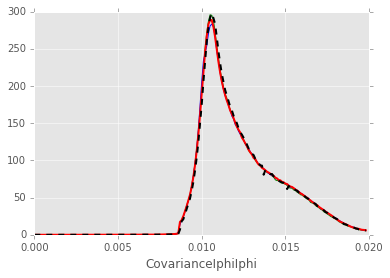

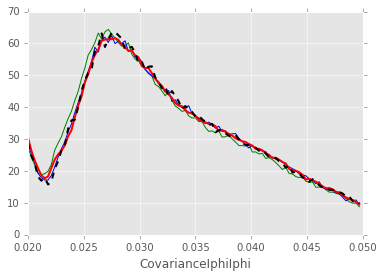

In [14]:
x4var = ['Pt', 'ScEta', 'Phi', 'rho'] 
print x4var
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi" ]
for y in ylist:
    X = x4var + [y]
    print 'Correction prediction on ', X, ' for ', y
    YPRED = qr_mc.predictY(X, y, "./weightsCorrections/weights_corrections")
    
    yvar = y
    yvarcorr = y +'_corr'

    rv  = []
    rv2 = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.04,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0003)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r", linewidth=2.0)
    pred_bins, _edges = np.histogram(YPRED+dfmc[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,pred_bins,"black", linestyle='--', linewidth=2.0)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r", linewidth=2.0)
    pred_bins, _edges = np.histogram(YPRED+dfmc[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,pred_bins,"black", linestyle='--', linewidth=2.0)

    